In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [6]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11666,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974902e+07,1.974902e+07,False,NaN,1,NaN,NaN,None,2024-09-03T11:33:00.000Z,59081.125478,2.313629e+10,-20.0802,-0.085018,0.780146,-5.456227,-2.937015,6.912215,-16.617755,1.166794e+12,56.4109,1.240704e+12,None,2024-09-03T11:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
1,1027,Ethereum,ETH,ethereum,9257,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203104e+08,1.203104e+08,True,NaN,2,NaN,NaN,None,2024-09-03T11:32:00.000Z,2509.240934,9.790580e+09,-31.4051,-0.079535,-0.647612,-4.760991,-14.116282,-14.764808,-33.997335,3.018879e+11,14.5953,3.018879e+11,None,2024-09-03T11:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
2,825,Tether USDt,USDT,tether,96220,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.181418e+11,1.202519e+11,True,NaN,3,NaN,NaN,None,2024-09-03T11:32:00.000Z,0.999837,3.973475e+10,-17.4885,-0.006071,-0.011181,-0.022745,0.023255,0.009847,0.002429,1.181226e+11,5.7116,1.202323e+11,None,2024-09-03T11:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-03 11:34:35.461065
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459348e+08,1.459348e+08,False,NaN,4,NaN,NaN,None,2024-09-03T11:32:00.000Z,534.503337,1.520862e+09,-10.3985,0.066094,2.636766,-3.238739,1.324112,10.696909,-23.503897,7.800264e+10,3.7709,7.800264e+10,None,2024-09-03T11:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
4,5426,Solana,SOL,solana,724,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.667018e+08,5.836687e+08,True,NaN,5,NaN,NaN,None,2024-09-03T11:32:00.000Z,134.296734,1.604679e+09,-33.3256,0.020701,1.361356,-13.192241,-6.795105,3.514807,-22.137484,6.267652e+10,3.0300,7.838479e+10,None,2024-09-03T11:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
5,3408,USDC,USDC,usd-coin,21830,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.476352e+10,3.476352e+10,False,NaN,6,NaN,NaN,None,2024-09-03T11:32:00.000Z,0.999953,3.731824e+09,-22.2832,-0.000484,-0.001940,0.003603,-0.014590,0.002763,0.001754,3.476187e+10,1.6806,3.476187e+10,None,2024-09-03T11:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-03 11:34:35.461065
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,None,2024-09-03T11:33:00.000Z,0.569047,7.606327e+08,-12.2226,-0.358132,2.312248,-3.148857,4.000535,37.066643,7.534486,3.200977e+10,1.5471,5.690467e+10,None,2024-09-03T11:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.458020e+11,1.458020e+11,True,NaN,8,NaN,NaN,None,2024-09-03T11:33:00.000Z,0.099530,3.856789e+08,-25.1450,0.032307,1.873902,-4.786629,-7.685664,-0.054570,-38.865788,1.451168e+10,0.7015,1.451168e+10,None,2024-09-03T11:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
8,1958,TRON,TRX,tron,1021,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.67584

In [12]:
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [13]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(10)
exit()

C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed
API Runner completed


C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\szymo\AppData\Local\Temp\ipykernel_38488\1187784635.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11666,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974902e+07,1.974902e+07,False,NaN,1,NaN,NaN,None,2024-09-03T11:33:00.000Z,59081.125478,2.313629e+10,-20.0802,-0.085018,0.780146,-5.456227,-2.937015,6.912215,-16.617755,1.166794e+12,56.4109,1.240704e+12,None,2024-09-03T11:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
1,1027,Ethereum,ETH,ethereum,9257,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203104e+08,1.203104e+08,True,NaN,2,NaN,NaN,None,2024-09-03T11:32:00.000Z,2509.240934,9.790580e+09,-31.4051,-0.079535,-0.647612,-4.760991,-14.116282,-14.764808,-33.997335,3.018879e+11,14.5953,3.018879e+11,None,2024-09-03T11:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
2,825,Tether USDt,USDT,tether,96220,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.181418e+11,1.202519e+11,True,NaN,3,NaN,NaN,None,2024-09-03T11:32:00.000Z,0.999837,3.973475e+10,-17.4885,-0.006071,-0.011181,-0.022745,0.023255,0.009847,0.002429,1.181226e+11,5.7116,1.202323e+11,None,2024-09-03T11:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-03 11:34:35.461065
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459348e+08,1.459348e+08,False,NaN,4,NaN,NaN,None,2024-09-03T11:32:00.000Z,534.503337,1.520862e+09,-10.3985,0.066094,2.636766,-3.238739,1.324112,10.696909,-23.503897,7.800264e+10,3.7709,7.800264e+10,None,2024-09-03T11:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
4,5426,Solana,SOL,solana,724,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.667018e+08,5.836687e+08,True,NaN,5,NaN,NaN,None,2024-09-03T11:32:00.000Z,134.296734,1.604679e+09,-33.3256,0.020701,1.361356,-13.192241,-6.795105,3.514807,-22.137484,6.267652e+10,3.0300,7.838479e+10,None,2024-09-03T11:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
5,3408,USDC,USDC,usd-coin,21830,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.476352e+10,3.476352e+10,False,NaN,6,NaN,NaN,None,2024-09-03T11:32:00.000Z,0.999953,3.731824e+09,-22.2832,-0.000484,-0.001940,0.003603,-0.014590,0.002763,0.001754,3.476187e+10,1.6806,3.476187e+10,None,2024-09-03T11:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-03 11:34:35.461065
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,None,2024-09-03T11:33:00.000Z,0.569047,7.606327e+08,-12.2226,-0.358132,2.312248,-3.148857,4.000535,37.066643,7.534486,3.200977e+10,1.5471,5.690467e+10,None,2024-09-03T11:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.458020e+11,1.458020e+11,True,NaN,8,NaN,NaN,None,2024-09-03T11:33:00.000Z,0.099530,3.856789e+08,-25.1450,0.032307,1.873902,-4.786629,-7.685664,-0.054570,-38.865788,1.451168e+10,0.7015,1.451168e+10,None,2024-09-03T11:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-03 11:34:35.461065
8,1958,TRON,TRX,tron,1021,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.67584

In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.00288,0.93308,-5.52569,-3.00936,6.68481,-16.71424
Ethereum,-0.00784,-0.49893,-4.79652,-14.02042,-14.79029,-34.05103
Tether USDt,0.00894,0.00637,-0.00060,0.02901,0.01006,0.01710
BNB,0.14518,2.81463,-3.24065,1.37834,10.45473,-23.52031
Solana,0.07229,1.58630,-13.19966,-6.76735,3.44976,-22.21517
USDC,-0.00251,0.00974,0.01402,-0.01533,-0.00634,0.00010
XRP,-0.26401,2.36863,-3.17790,4.13189,36.68560,7.54243
Dogecoin,0.15957,1.98858,-4.67494,-7.62767,0.10121,-38.85184
TRON,0.05905,-2.74462,-5.36318,18.85043,21.34790,33.68994


In [17]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.00288
             quote.USD.percent_change_24h     0.93308
             quote.USD.percent_change_7d     -5.52569
             quote.USD.percent_change_30d    -3.00936
             quote.USD.percent_change_60d     6.68481
             quote.USD.percent_change_90d   -16.71424
Ethereum     quote.USD.percent_change_1h     -0.00784
             quote.USD.percent_change_24h    -0.49893
             quote.USD.percent_change_7d     -4.79652
             quote.USD.percent_change_30d   -14.02042
             quote.USD.percent_change_60d   -14.79029
             quote.USD.percent_change_90d   -34.05103
Tether USDt  quote.USD.percent_change_1h      0.00894
             quote.USD.percent_change_24h     0.00637
             quote.USD.percent_change_7d     -0.00060
             quote.USD.percent_change_30d     0.02901
             quote.USD.percent_change_60d     0.01006
             quote.USD.percent_change_90

In [31]:
df5 = df4.to_frame(name='values')
df5


values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.00288
            quote.USD.percent_change_24h   0.93308
            quote.USD.percent_change_7d   -5.52569
            quote.USD.percent_change_30d  -3.00936
            quote.USD.percent_change_60d   6.68481
            quote.USD.percent_change_90d -16.71424
Ethereum    quote.USD.percent_change_1h   -0.00784
            quote.USD.percent_change_24h  -0.49893
            quote.USD.percent_change_7d   -4.79652
            quote.USD.percent_change_30d -14.02042
            quote.USD.percent_change_60d -14.79029
            quote.USD.percent_change_90d -34.05103
Tether USDt quote.USD.percent_change_1h    0.00894
            quote.USD.percent_change_24h   0.00637
            quote.USD.percent_change_7d   -0.00060
            quote.USD.percent_change_30d   0.02901
            quote.USD.percent_change_60d   0.01006
            quote.USD.percent_change_90d   0.01710
BNB         quote.USD.percent_change_1h    0.14518
            quote.USD.percent_change_24h   2.81463
            quote.USD.percent_change_7d   -3.24065
            quote.USD.percent_change_30d   1.37834
            quote.USD.percent_change_60d  10.45473
            quote.USD.percent_change_90d -23.52031
Solana      quote.USD.percent_change_1h    0.07229
            quote.USD.percent_change_24h   1.58630
            quote.USD.percent_change_7d  -13.19966
            quote.USD.percent_change_30d  -6.76735
            quote.USD.percent_change_60d   3.44976
            quote.USD.percent_change_90d -22.21517
USDC        quote.USD.percent_change_1h   -0.00251
            quote.USD.percent_change_24h   0.00974
            quote.USD.percent_change_7d    0.01402
            quote.USD.percent_change_30d  -0.01533
            quote.USD.percent_change_60d  -0.00634
            quote.USD.percent_change_90d   0.00010
XRP         quote.USD.percent_change_1h   -0.26401
            quote.USD.percent_change_24h   2.36863
            quote.USD.percent_change_7d   -3.17790
            quote.USD.percent_change_30d   4.13189
            quote.USD.percent_change_60d  36.68560
            quote.USD.percent_change_90d   7.54243
Dogecoin    quote.USD.percent_change_1h    0.15957
            quote.USD.percent_change_24h   1.98858
            quote.USD.percent_change_7d   -4.67494
            quote.USD.percent_change_30d  -7.62767
            quote.USD.percent_change_60d   0.10121
            quote.USD.percent_change_90d -38.85184
TRON        quote.USD.percent_change_1h    0.05905
            quote.USD.percent_change_24h  -2.74462
            quote.USD.percent_change_7d   -5.36318
            quote.USD.percent_change_30d  18.85043
            quote.USD.percent_change_60d  21.34790
            quote.USD.percent_change_90d  33.68994
Toncoin     quote.USD.percent_change_1h   -0.14845
            quote.USD.percent_change_24h  -0.90234
            quote.USD.percent_change_7d   -4.69625
            quote.USD.percent_change_30d -14.53443
            quote.USD.percent_change_60d -25.36090
            quote.USD.percent_change_90d -30.05899
Cardano     quote.USD.percent_change_1h   -0.13178
            quote.USD.percent_change_24h  -1.64355
            quote.USD.percent_change_7d   -9.25655
            quote.USD.percent_change_30d  -8.01367
            quote.USD.percent_change_60d  -4.63498
            quote.USD.percent_change_90d -28.35493
Avalanche   quote.USD.percent_change_1h    0.08205
            quote.USD.percent_change_24h   0.50737
            quote.USD.percent_change_7d  -13.35052
            quote.USD.percent_change_30d  -0.76843
            quote.USD.percent_change_60d  -7.28217
            quote.USD.percent_change_90d -38.59609
Shiba Inu   quote.USD.percent_change_1h   -0.15338
            quote.USD.percent_change_24h   0.35161
            quote.USD.percent_change_7d   -5.81399
            quote.USD.percent_change_30d  -3.29306
            quote.USD.percent_change_60d  -1.71531
            quo

In [32]:
df5.count()

values    90
dtype: int64

In [33]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00288
1,Bitcoin,quote.USD.percent_change_24h,0.93308
2,Bitcoin,quote.USD.percent_change_7d,-5.52569
3,Bitcoin,quote.USD.percent_change_30d,-3.00936
4,Bitcoin,quote.USD.percent_change_60d,6.68481
5,Bitcoin,quote.USD.percent_change_90d,-16.71424
6,Ethereum,quote.USD.percent_change_1h,-0.00784
7,Ethereum,quote.USD.percent_change_24h,-0.49893
8,Ethereum,quote.USD.percent_change_7d,-4.79652
9,Ethereum,quote.USD.percent_change_30d,-14.02042


In [34]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00288
1,Bitcoin,quote.USD.percent_change_24h,0.93308
2,Bitcoin,quote.USD.percent_change_7d,-5.52569
3,Bitcoin,quote.USD.percent_change_30d,-3.00936
4,Bitcoin,quote.USD.percent_change_60d,6.68481
5,Bitcoin,quote.USD.percent_change_90d,-16.71424
6,Ethereum,quote.USD.percent_change_1h,-0.00784
7,Ethereum,quote.USD.percent_change_24h,-0.49893
8,Ethereum,quote.USD.percent_change_7d,-4.79652
9,Ethereum,quote.USD.percent_change_30d,-14.02042


In [36]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.00288
1,Bitcoin,24h,0.93308
2,Bitcoin,7d,-5.52569
3,Bitcoin,30d,-3.00936
4,Bitcoin,60d,6.68481
5,Bitcoin,90d,-16.71424
6,Ethereum,1h,-0.00784
7,Ethereum,24h,-0.49893
8,Ethereum,7d,-4.79652
9,Ethereum,30d,-14.02042


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

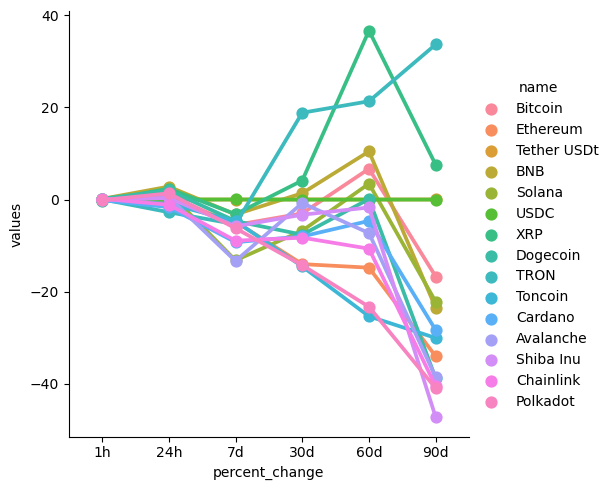

In [38]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [39]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,59081.12548,2024-09-03 11:34:35.461065
0,Bitcoin,59023.18492,2024-09-03 11:42:38.416175
0,Bitcoin,59060.49023,2024-09-03 11:42:48.684629
0,Bitcoin,59060.49023,2024-09-03 11:42:58.913642
0,Bitcoin,59060.49023,2024-09-03 11:43:09.206950
0,Bitcoin,59060.49023,2024-09-03 11:43:19.455118
0,Bitcoin,59060.49023,2024-09-03 11:43:29.683823
0,Bitcoin,59060.49023,2024-09-03 11:43:39.961867


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

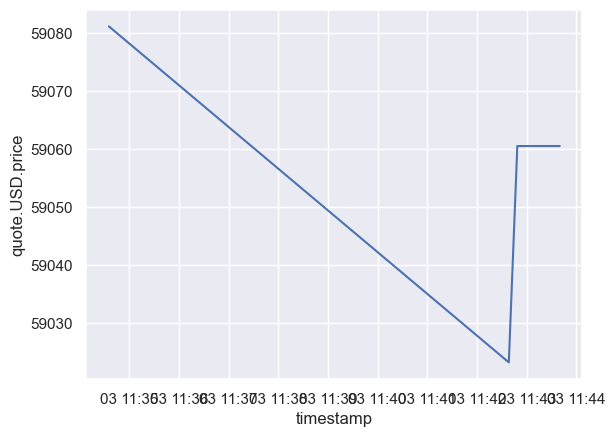

In [40]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)